In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
IMG_SIZE=224
BATCH_SIZE=32

In [27]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [28]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain tumor(2)',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')

Found 704 images belonging to 1 classes.


In [29]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain tumor(2)',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')

Found 190 images belonging to 1 classes.


In [30]:
 model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [45]:
model.save('/content/drive/MyDrive/brain tumor(2).h5')

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/brain tumor(2).h5')
print("Model Loaded")

Model Loaded


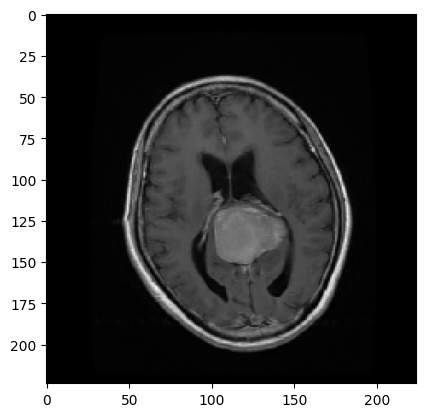

In [47]:
 test_image_path="/content/drive/MyDrive/brain tumor(2)/brain_tumor_dataset/yes/Y1720.jpg"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [56]:
 img_array=image.img_to_array(img)
 img_array=np.expand_dims(img_array,axis=0)
 img_array /= 255
 prediction=model.predict(img_array)
 print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0.]]


In [57]:
if prediction>=0.5:
  print("Brain Tumor Detected")
else:
  print("Brain Tumor Not Detected")

Brain Tumor Not Detected
